In [1]:
import pandas as pd
raw_df=pd.read_excel(r"D:\Business Analytics\Important files\Neural networks\renege.xlsx")

In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7569 entries, 0 to 7568
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CID       7569 non-null   object
 1   workexp   7569 non-null   int64 
 2   age       7569 non-null   int64 
 3   gender    7569 non-null   object
 4   Source    7569 non-null   object
 5   Educ      7569 non-null   object
 6   previous  7569 non-null   object
 7   location  7569 non-null   object
 8   Joined    7569 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 532.3+ KB


In [3]:
raw_df

,CID,workexp,age,gender,Source,Educ,previous,location,Joined
0,C2015UUGM44,3,32,F,3-SocialMedia,e2,Yes,L4,0
1,C20152LRE59,3,37,M,1-Consultancy,e1,Yes,L5,1
2,C20156UMBMO,4,36,F,3-SocialMedia,e2,Yes,L1,0
3,C2015LZSL81,3,44,M,1-Consultancy,e1,Yes,L3,1
4,C2015JFDHT1,4,43,M,2-Referral,e1,Yes,L1,1
...,...,...,...,...,...,...,...,...,...
7564,C2015XGXX2J,4,44,M,2-Referral,e1,Yes,L1,1
7565,C2015VA2O57,5,37,M,2-Referral,e2,No,L4,0
7566,C2015USNSNG,4,36,F,3-SocialMedia,e2,Yes,L7,1
7567,C2015BWO9N1,4,36,M,3-SocialMedia,e2,No,L1,0


In [4]:
X_features = list( raw_df.columns )
X_features.remove( 'Joined' )
X_features.remove( 'CID' )
print(X_features)

['workexp', 'age', 'gender', 'Source', 'Educ', 'previous', 'location']


In [5]:
X =  raw_df[X_features]

In [6]:
Y = raw_df.Joined.astype('category')
print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 7569 entries, 0 to 7568
Series name: Joined
Non-Null Count  Dtype   
--------------  -----   
7569 non-null   category
dtypes: category(1)
memory usage: 7.6 KB
None


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

<class 'pandas.core.series.Series'>
Index: 5298 entries, 1889 to 7002
Series name: Joined
Non-Null Count  Dtype   
--------------  -----   
5298 non-null   category
dtypes: category(1)
memory usage: 46.7 KB
None


In [8]:
categorical_columns = ['gender','Source','Educ','previous','location']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)

In [9]:
from sklearn.preprocessing import MinMaxScaler
continuous_columns= ['workexp','age']
scaler_min_max = MinMaxScaler()
X_train_encoded[continuous_columns] = scaler_min_max.fit_transform(X_train_encoded[continuous_columns])
X_test_encoded[continuous_columns] = scaler_min_max.fit_transform(X_test_encoded[continuous_columns])

In [10]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5298 entries, 1889 to 7002
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   workexp               5298 non-null   float64
 1   age                   5298 non-null   float64
 2   gender_M              5298 non-null   int32  
 3   Source_2-Referral     5298 non-null   int32  
 4   Source_3-SocialMedia  5298 non-null   int32  
 5   Educ_e2               5298 non-null   int32  
 6   previous_Yes          5298 non-null   int32  
 7   location_L2           5298 non-null   int32  
 8   location_L3           5298 non-null   int32  
 9   location_L4           5298 non-null   int32  
 10  location_L5           5298 non-null   int32  
 11  location_L7           5298 non-null   int32  
dtypes: float64(2), int32(10)
memory usage: 331.1 KB


In [11]:
X_train_encoded.head()

,workexp,age,gender_M,Source_2-Referral,Source_3-SocialMedia,Educ_e2,previous_Yes,location_L2,location_L3,location_L4,location_L5,location_L7
1889,0.666667,0.666667,1,0,1,1,1,1,0,0,0,0
1131,0.666667,0.555556,0,0,1,1,1,0,1,0,0,0
5819,0.666667,0.666667,1,0,0,1,1,1,0,0,0,0
5431,0.333333,0.500000,1,0,0,1,1,0,0,0,1,0
6647,0.666667,1.000000,1,1,0,0,1,0,1,0,0,0


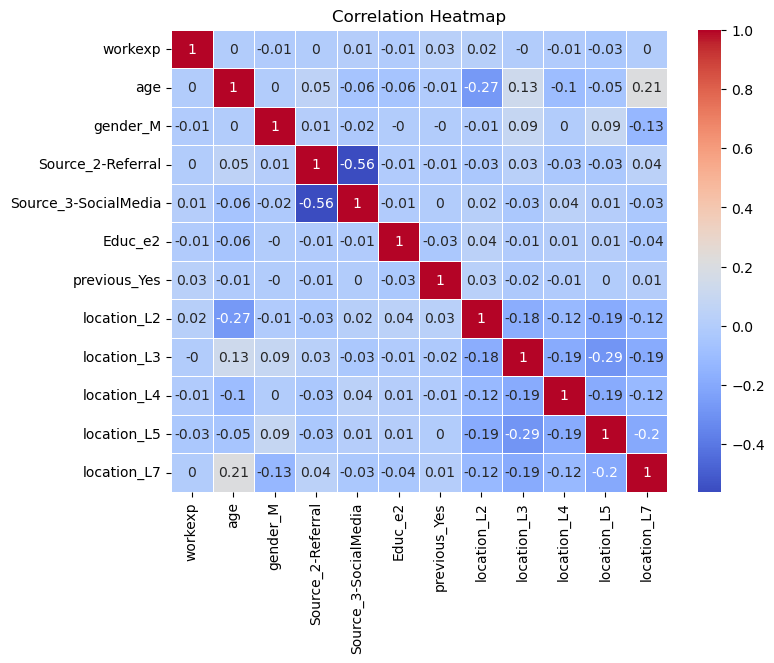

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
corr_matrix

,workexp,age,gender_M,Source_2-Referral,Source_3-SocialMedia,Educ_e2,previous_Yes,location_L2,location_L3,location_L4,location_L5,location_L7
workexp,1.000000,0.000867,-0.011264,0.004432,0.007896,-0.012334,0.025400,0.021956,-0.004062,-0.008893,-0.031288,0.000376
age,0.000867,1.000000,0.004479,0.053601,-0.061811,-0.059932,-0.007156,-0.268993,0.133609,-0.101654,-0.048709,0.206405
gender_M,-0.011264,0.004479,1.000000,0.013644,-0.016401,-0.003616,-0.001057,-0.013379,0.093323,0.002452,0.093104,-0.134907
Source_2-Referral,0.004432,0.053601,0.013644,1.000000,-0.559988,-0.012482,-0.009683,-0.032638,0.026610,-0.031261,-0.025088,0.044694
Source_3-SocialMedia,0.007896,-0.061811,-0.016401,-0.559988,1.000000,-0.006427,0.001883,0.020457,-0.025447,0.037408,0.007572,-0.026514
Educ_e2,-0.012334,-0.059932,-0.003616,-0.012482,-0.006427,1.000000,-0.025471,0.037056,-0.008124,0.011010,0.014219,-0.044341
previous_Yes,0.025400,-0.007156,-0.001057,-0.009683,0.001883,-0.025471,1.000000,0.029689,-0.015918,-0.010414,0.000266,0.006095
location_L2,0.021956,-0.268993,-0.013379,-0.032638,0.020457,0.037056,0.029689,1.000000,-0.184386,-0.121030,-0.191456,-0.122791
location_L3,-0.004062,0.133609,0.093323,0.026610,-0.025447,-0.008124,-0.015918,-0.184386,1.000000,-0.185837,-0.293975,-0.188541
location_L4,-0.008893,-0.101654,0.002452,-0.031261,0.037408,0.011010,-0.010414,-0.121030,-0.185837,1.000000,-0.192963,-0.123757


In [14]:
# No of hidden nodes = 2/3*(No of i/p nodes + No of o/p nodes) = 2/3*(12+2) = 9.33 = 9.

In [15]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=42, verbose = True,max_iter = 1500, hidden_layer_sizes= (9,),early_stopping = True,learning_rate_init=0.2)
#learning_rate_init has to be tweaked for better

In [16]:
print("Hyperparameters of the MLPClassifier:\n",nn_model.get_params())

Hyperparameters of the MLPClassifier:
 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (9,), 'learning_rate': 'constant', 'learning_rate_init': 0.2, 'max_fun': 15000, 'max_iter': 1500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}


In [17]:
nn_model.fit(X_train_encoded, y_train)

Iteration 1, loss = 0.45784224
Validation score: 0.803774
Iteration 2, loss = 0.38935619
Validation score: 0.784906
Iteration 3, loss = 0.33394871
Validation score: 0.798113
Iteration 4, loss = 0.31676650
Validation score: 0.811321
Iteration 5, loss = 0.31937584
Validation score: 0.816981
Iteration 6, loss = 0.31508116
Validation score: 0.820755
Iteration 7, loss = 0.31755819
Validation score: 0.796226
Iteration 8, loss = 0.31277409
Validation score: 0.809434
Iteration 9, loss = 0.30601658
Validation score: 0.815094
Iteration 10, loss = 0.30862077
Validation score: 0.816981
Iteration 11, loss = 0.31264405
Validation score: 0.794340
Iteration 12, loss = 0.31273402
Validation score: 0.822642
Iteration 13, loss = 0.30467640
Validation score: 0.820755
Iteration 14, loss = 0.29913670
Validation score: 0.835849
Iteration 15, loss = 0.29075401
Validation score: 0.811321
Iteration 16, loss = 0.28997510
Validation score: 0.837736
Iteration 17, loss = 0.29255480
Validation score: 0.805660
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(9,),
              learning_rate_init=0.2, max_iter=1500, random_state=42,
              verbose=True)

In [18]:
y_prob=nn_model.predict_proba(X_test_encoded)[:,1]
y_prob

array([4.41381367e-01, 4.13482764e-01, 1.67864371e-04, ...,
       4.41381367e-01, 7.44657310e-02, 2.43011859e-04])

In [19]:
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})
print(y_pred_df.head())

     actual_Y  predicted_prob
6161        1        0.441381
1012        0        0.413483
6625        0        0.000168
4067        0        0.145442
5803        1        0.959075


In [20]:
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
6161        1        0.441381            0
1012        0        0.413483            0
6625        0        0.000168            0
4067        0        0.145442            0
5803        1        0.959075            1


In [21]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[1197   32]
 [ 297  745]]


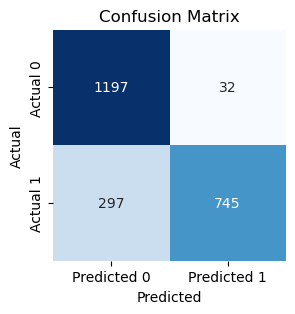

In [22]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
#print(f"Specificity: {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.71
Accuracy: 0.86


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1229
           1       0.96      0.71      0.82      1042

    accuracy                           0.86      2271
   macro avg       0.88      0.84      0.85      2271
weighted avg       0.87      0.86      0.85      2271



In [25]:
#accuracy = 86%
#sensitivity = 71%
#specificity = 97%

In [51]:
# The learning rate in a neural network controls how much the model's weights are adjusted with respect to the gradient during each iteration. 
# High learning rate:

# Accuracy: Likely to decrease due to overshooting optimal weights.
# Sensitivity: Might increase for one class but often at the cost of specificity.
# Specificity: Likely to decrease, with the model missing many negative class instances.
# Low learning rate:

# Accuracy: Can eventually improve but at the cost of slower training. Too low may result in suboptimal performance.
# Sensitivity: Likely to improve with proper convergence but may be low in the early stages.
# Specificity: Likely to improve, but early stages may show poor performance due to underfitting.